In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm, trange
import os
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation
import warnings  
warnings.filterwarnings("ignore") 

In [154]:
df = pd.read_csv("data.csv",header=0)
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

#fmean= list(df.columns[1:11])
#fse= list(df.columns[11:20])
#fworst=list(df.columns[21:31])

df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [155]:
fmean=df.iloc[:,1:11]
fse=df.iloc[:,11:21]
fworst=df.iloc[:,21:31]
fall=df.iloc[:,1:31]

In [156]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [157]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

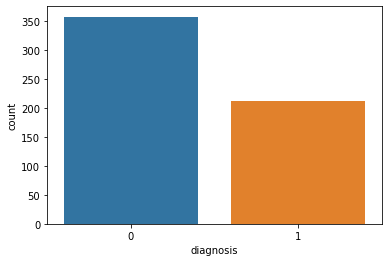

In [158]:
sns.countplot(df['diagnosis'],label="Count")

In [159]:
from sklearn import tree, ensemble
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(random_state=100)
rf = RandomForestClassifier(n_estimators = 100,random_state=100)
svm = SVC(random_state=100)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,3), random_state=100)
dt = DecisionTreeClassifier(random_state=100)
kn = KNeighborsClassifier(n_neighbors=3)

In [160]:
def data_base(data):
    
    
    #split X and y
    X = data
    y = df.iloc[:,0]

    
    lr_scores = cross_val_score(lr, X, y, cv = 5, scoring='accuracy')
    lr_scores_m = str(100*round(lr_scores.mean(),4)) + "%"

    rf_scores = cross_val_score(rf, X, y, cv = 5, scoring='accuracy')
    rf_scores_m = str(100*round(rf_scores.mean(),4)) + "%"

    svm_scores = cross_val_score(svm, X, y, cv = 5, scoring='accuracy')
    svm_scores_m = str(100*round(svm_scores.mean(),4)) + "%"

    dt_scores = cross_val_score(dt, X, y, cv = 5, scoring='accuracy')
    dt_scores_m = str(100*round(dt_scores.mean(),4)) + "%"

    kn_scores = cross_val_score(kn, X, y, cv = 5, scoring='accuracy')
    kn_scores_m = str(100*round(kn_scores.mean(),4)) + "%"

    rows = [(lr_scores_m, rf_scores_m, svm_scores_m, dt_scores_m, kn_scores_m)]
    
    table = pd.DataFrame(rows, columns=model)
    
    return table

In [165]:
model = ['lr','rf','svm','dt','kn']
index = ['mean','se','worst','all']
data = [fmean, fse, fworst, fall]
baseline_table = pd.DataFrame(columns=model)
for i in tqdm(data) :
    base_rows = []
    base_rows = data_base(i)
    baseline_table = pd.concat([baseline_table,base_rows],axis=0)

baseline_table['data'] = index
baseline_table.set_index('data')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.54it/s]


,lr,rf,svm,dt,kn
data,,,,,
mean,90.86%,94.38%,88.58%,91.92%,87.87%
se,88.92999999999999%,88.4%,86.65%,82.42%,84.89%
worst,94.73%,95.43%,91.92%,93.32000000000001%,90.86%
all,93.85%,96.13000000000001%,91.22%,91.39%,91.91%
